# The building blocks of DL 1

> Gradient Descent

- toc: false 
- badges: true
- comments: true
- categories: [basic, sgd]

Deep learning is so simple that it is hard to believe. Especially with how much magical it seems at first. At it's core is a piece of code that allows, one step at a time, to be just a bit closer to the solution. You can think of it like the way of finding the top of the mountain:

![Test](https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg "Credit: https://en.wikipedia.org/wiki/Gradient_descent")

Vocabulary:

- step - single step of the optimization algorithm that makes parameters of a function just a bit better
- gradient - the slope of the loss function, that we want to minimize
- learning rate - how fast we adjust parameters based on the gradient

### Task: Find minimum for $f: a x^2 + b$ with Gradient Descent

We have single variable here: $x$. With Gradient Descent we'll find the value where $f$ is minimal.

In short, gradient descent is an algorithm that walks down the slope - no more no less.

An example function $f$ in python looks like this:

In [1]:
def f(x):
    return 1.2 * x**2 + 4

In [2]:
#hide_input

import numpy as np

def plot_function(ax, f, x_min=-5, x_max=5):
    X = np.arange(x_min, x_max, 0.1)
    Y = [f(x) for x in X]

    ax.plot(X, Y, 'r')

To compute gradient at where we are now, we will use PyTorch magic:

In [3]:
import torch

x = torch.tensor(-3.).requires_grad_()

To walk along the function, we will change $x$ by the fraction of the gradient (```gradient * learning_rate```)

In [4]:
learning_rate = 0.2

and this is gradient descent algorightm in code:

In [5]:
# single step of the gradient descent algorithm
def step(x, f):
    # compute y at a given value of x
    y = f(x)
    
    # the backward function of PyTorch tensor computes gradients
    y.backward()
    
    # change value of x in a direction where function decreases
    # (don't bother about x.data and x.grad = None - it is just necessary boilerplate)
    x.data = x - learning_rate * x.grad.data
    x.grad = None
    
    return x

gather _x_-es and _y_-s for 10 iterations

In [6]:
xypairs = []
for i in range(10):
    xypairs.append([x.data, f(x)])
    print(f"f({x:.2}) = {f(x):.2}")
    x = step(x, f)

f(-3.0) = 1.5e+01
f(-1.6) = 6.9
f(-0.81) = 4.8
f(-0.42) = 4.2
f(-0.22) = 4.1
f(-0.11) = 4.0
f(-0.059) = 4.0
f(-0.031) = 4.0
f(-0.016) = 4.0
f(-0.0083) = 4.0


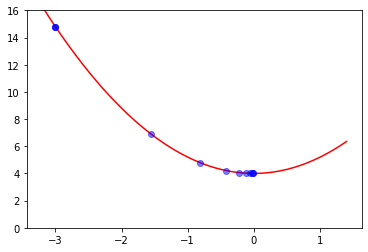

In [7]:
#hide_input

# TODO: fix animation and produce gif image to include in the blog
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylim((0, 16))
plot_function(ax1, f, -3.2, 1.5)

def animate(xy):
    x, y = xy
#     ax1.clear()
    ax1.plot(x.data, y.data, 'bo', alpha=.5)
    
ani = animation.FuncAnimation(fig, animate,frames=xypairs, interval=400)
HTML(ani.to_jshtml())

And believe it or not, this is the building block of each the Neural Net - gradient descent algirithm. Stay tuned for the next post where we will use it on a MedicalNist dataset.